In [128]:
# reload module ,when module changed
import feature as ft
import algorithm as al
import importlib
importlib.reload(ft)
importlib.reload(al)

<module 'algorithm' from '/Users/pinky/workspace/jupyter/aienv/workspace/IDSWithAI/algorithm.py'>

In [133]:
import feature as ft
import algorithm as al
import numpy as np

# read data from files
train = ft.read_data("train")
test = ft.read_data("test")

X_train= train.iloc[:,:-1]
Y_train = train.iloc[:,-1]

X_test= test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

# print( train.dtypes)
print( train.shape)
print( test.shape )
# print(train)

numeric_features = X_train.select_dtypes( np.number ).columns
train_Ori = train
test_Ori = test






(175341, 43)
(82332, 43)


In [134]:
# use different way to deal the feature
# X_train, X_test = ft.feature_simple( X_train, X_test )
X_train, X_test = ft.feature_current( X_train, X_test )




             dur proto service state     spkts     dpkts    sbytes     dbytes  \
0       0.114647   tcp       -   FIN  1.945910  1.609438  5.556828   5.153292   
1       0.500716   tcp       -   FIN  2.708050  3.663562  6.599870  10.645782   
2       0.964368   tcp       -   FIN  2.197225  2.833213  5.899897   9.486987   
3       0.986429   tcp     ftp   FIN  2.564949  2.564949  6.444131   6.647688   
4       0.371187   tcp       -   FIN  2.397895  1.945910  6.282267   5.594711   
...          ...   ...     ...   ...       ...       ...       ...        ...   
175336  0.000009   udp     dns   INT  1.098612  0.000000  4.744932   0.000000   
175337  0.409299   tcp       -   FIN  2.397895  2.197225  6.431331   5.872118   
175338  0.000009   udp     dns   INT  1.098612  0.000000  4.744932   0.000000   
175339  0.000009   udp     dns   INT  1.098612  0.000000  4.744932   0.000000   
175340  0.000009   udp     dns   INT  1.098612  0.000000  4.744932   0.000000   

             rate  sttl  ..

In [118]:
# example of simple train
from sklearn.neighbors import KNeighborsClassifier
nc = 20
knn = KNeighborsClassifier(n_neighbors=nc)
al.train_and_evaluate( knn, X_train, Y_train, X_test, Y_test )


Accuracy: 0.8704999271243259


0.8704999271243259

In [46]:
# example of train with validation dataset
classfiers = []
for nc in [10,20]:
    knn = KNeighborsClassifier(n_neighbors=nc)
    classfiers.append(knn)

al.train_and_evaluate_with_val( classfiers, X_train, Y_train, X_test, Y_test )

Test (on val dateset ) accuracy: 95.05% __ 93.65%
Test (on val dateset ) accuracy: 94.69% __ 93.85%


Test accuracy: 83.85%


(0.8384710683573823, KNeighborsClassifier(n_neighbors=20))

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
al.train_and_evaluate(clf, X_train, Y_train, X_test, Y_test )

Accuracy: 0.8635524461934606


0.8635524461934606

In [69]:
#通过决策树，观察哪些字段对决策的重要性更大
# 获取特征重要性并创建DataFrame
feature_importances = clf.feature_importances_
feature_names = X_train.columns
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 按重要性排序
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df.to_csv('output.csv', index=False)
    

In [108]:
from sklearn.linear_model import SGDClassifier
#SGD model
sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
al.train_and_evaluate( sgd, X_train, Y_train, X_test, Y_test )


Accuracy: 0.8145557013069038


0.8145557013069038

In [70]:
# 通过决策树，找到没啥影响的列，删掉他们
features_with_zero_importance = [feature_names[i] for i, importance in enumerate(feature_importances) if importance == 0]
print( features_with_zero_importance)

X_train.drop( features_with_zero_importance, axis = 1, inplace = True )
X_test.drop( features_with_zero_importance, axis = 1, inplace = True )

print(X_train.shape)
print(X_test.shape)

['dwin', 'ct_ftp_cmd', 'is_sm_ips_ports', 'proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'proto_l2tp', 'proto_larp', 'proto_leaf-1', 'proto_le

0.1   -0.517290
0.2   -0.517285
0.3   -0.517281
0.4   -0.517281
0.5   -0.514879
0.6   -0.425416
0.7    0.089410
0.8    0.437778
0.9    0.888866
Name: dur, dtype: float64
右偏: 3.3663551123626902
dur右偏: 3.3663551123626902
spkts右偏: 1.1163200030350757
dpkts右偏: 0.7845244619554637
sbytes右偏: 1.168992682339287
dbytes右偏: 0.37186626252208804
ratenot 右偏 -0.2029734179166805
sttlnot 右偏 -0.6781034355138321
dttl右偏: 0.1956270239067868
sloadnot 右偏 -0.4759244392930857
dload右偏: 0.3149053105881912
sloss右偏: 1.376676337933982
dloss右偏: 1.7863397235060787
sinpkt右偏: 1.2404978885982072
dinpkt右偏: 0.9014124598611017
sjit右偏: 0.43025983715523947
djit右偏: 0.8476213609905618
swin右偏: 0.1769399087145943
stcpb右偏: 0.2079702996387571
dtcpb右偏: 0.2080418619697656
dwin右偏: 0.19675521515459682
tcprtt右偏: 2.400878256682933
synack右偏: 3.432755539661469
ackdat右偏: 3.4274429814223297
smean右偏: 2.029449671682816
dmean右偏: 0.21849542376567058
trans_depth右偏: 2.9245726886627854
response_body_len右偏: 4.167989381481533
ct_srv_src右偏: 0.433187108

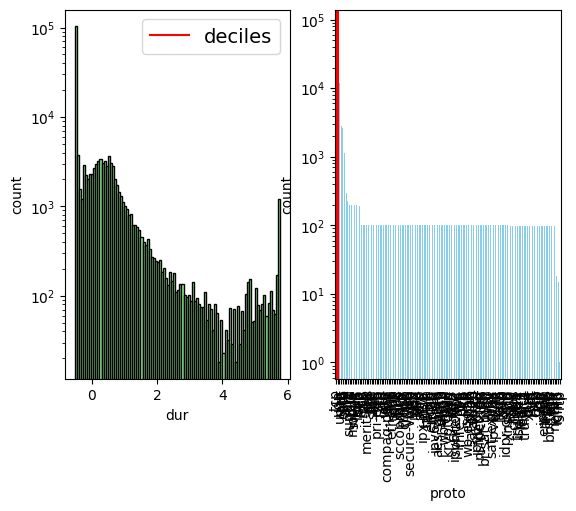

In [135]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew

data = X_train

fig, axs = plt.subplots(1,2)
ax = axs[0]

deciles = data['dur'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
print(deciles)
data['dur'].plot( kind='hist', color='lightgreen', edgecolor='black', bins=100, ax = ax )
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xlabel( 'dur' )
ax.set_ylabel('count')

skewness = skew( data['dur'] )
if skewness > 0 :
    print("右偏:", skewness)
    pass
else:
    print("not 右偏", skewness)

ax1=axs[1]
train_Ori['proto'].value_counts().plot( kind = 'bar', color='skyblue', ax=ax1 )
ax1.set_yscale('log')
ax1.set_xlabel( 'proto' )
ax1.set_ylabel('count')

for col in numeric_features:
    skewness = skew( data[col] )
    if skewness > 0:
        print(f"{col}右偏:", skewness)
        pass
    else:
        print(f"{col}not 右偏", skewness)



# for index,  col in enumerate(data.columns):
#     print(f"draw:{index}", col )
#     if( index >= 8 ):
#         break;
#     i = int( index / coln )
#     j = index % coln
#     ax = axs[i,j]
#     if data[col].dtype != 'object':
#         # data.iloc[col].plot( kind='hist', color='lightgreen', edgecolor='black', ax=axs[index] )
#         pass
#     else:
#         data[col].value_counts().plot( kind = 'bar', color='skyblue', ax=axs[index] )

#     ax.set_title(f'Feature {i}')
#     ax.set_xlabel( col )
#     ax.set_ylabel('count')

# plt.tight_layout()

